In [125]:
import pandas as pd

In [126]:
data = pd.read_csv('./uci.csv')
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [127]:
data.isna().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [128]:
data = data.dropna()
data.isna().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [129]:
import seaborn as sns

<Axes: xlabel='age', ylabel='sex'>

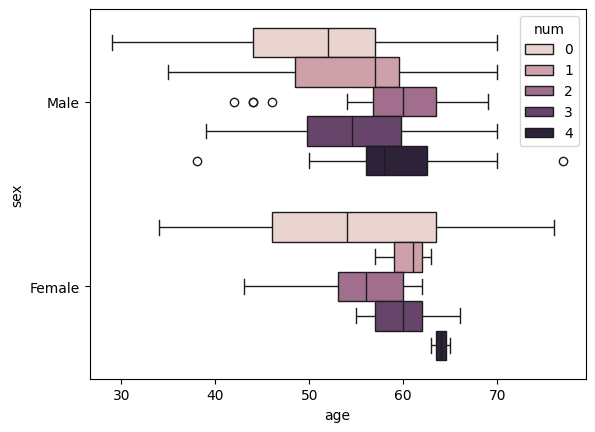

In [130]:
sns.boxplot(data= data, x = 'age', y = 'sex', hue = 'num')

<Axes: xlabel='age', ylabel='Count'>

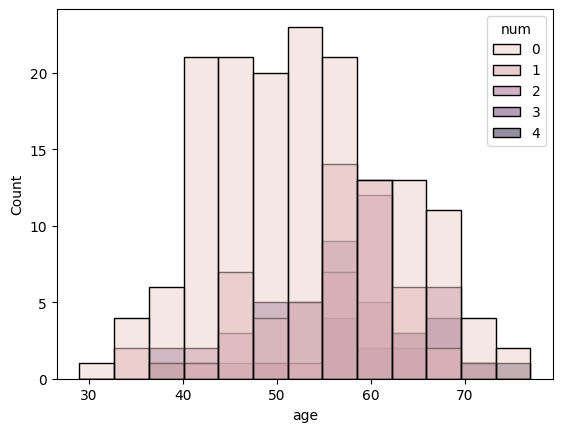

In [131]:
sns.histplot(data=data, x="age", hue = 'num')

<Axes: xlabel='Count', ylabel='num'>

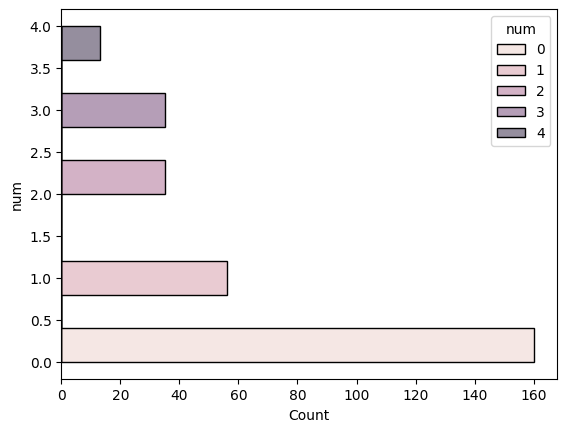

In [132]:
sns.histplot(data=data, y="num", hue = 'num')

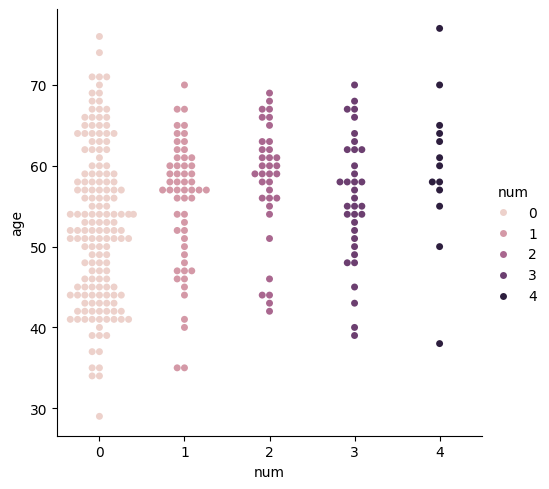

In [133]:
sns.catplot(data=data, kind="swarm", x="num", y="age", hue="num")

In [134]:
data.dtypes

id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

In [135]:
cols = ['sex', 'dataset', 'cp', 'fbs','restecg','exang','slope','thal']
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cols:
    data[col] = le.fit_transform(data[col].values.reshape(-1,1))
data.dtypes

/Users/bhagya/Desktop/code/uci-heart/env/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/bhagya/Desktop/code/uci-heart/env/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/bhagya/Desktop/code/uci-heart/env/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/bhagya/Desktop/code/uci-heart/env/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:110: DataConve

id            int64
age           int64
sex           int64
dataset       int64
cp            int64
trestbps    float64
chol        float64
fbs           int64
restecg       int64
thalch      float64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal          int64
num           int64
dtype: object

In [136]:
data.corr()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,1.000000,0.001379,-0.056881,0.418747,-0.094403,-0.021051,-0.138639,-0.060584,0.192594,-0.159716,0.045102,-0.091294,0.007997,0.020103,-0.034021,0.031397
age,0.001379,1.000000,-0.093693,-0.013136,-0.060833,0.286149,0.199258,0.132752,-0.115722,-0.384176,0.092506,0.195929,-0.157545,0.362764,0.059228,0.221787
sex,-0.056881,-0.093693,1.000000,0.053518,-0.047326,-0.065209,-0.202500,0.036869,-0.062598,-0.067820,0.148956,0.108107,-0.036213,0.088292,0.217901,0.226636
dataset,0.418747,-0.013136,0.053518,1.000000,-0.071649,-0.007536,-0.155494,-0.031895,0.070336,-0.123605,0.110614,0.029597,-0.049865,-0.055901,0.089030,0.003390
cp,-0.094403,-0.060833,-0.047326,-0.071649,1.000000,0.038374,-0.060095,0.121552,0.036252,0.301240,-0.385983,-0.140811,0.104842,-0.217937,-0.166515,-0.411183
trestbps,-0.021051,0.286149,-0.065209,-0.007536,0.038374,1.000000,0.134240,0.179791,-0.120111,-0.053320,0.067843,0.191144,-0.121500,0.096641,0.061708,0.159272
chol,-0.138639,0.199258,-0.202500,-0.155494,-0.060095,0.134240,1.000000,0.016939,-0.152597,0.014894,0.042846,0.033964,0.015971,0.121907,0.066443,0.065081
fbs,-0.060584,0.132752,0.036869,-0.031895,0.121552,0.179791,0.016939,1.000000,-0.083047,-0.002929,-0.004809,0.007252,-0.045958,0.153718,-0.020172,0.048892
restecg,0.192594,-0.115722,-0.062598,0.070336,0.036252,-0.120111,-0.152597,-0.083047,1.000000,0.017245,-0.053871,-0.049834,0.083082,-0.112497,0.000182,-0.132639
thalch,-0.159716,-0.384176,-0.067820,-0.123605,0.301240,-0.053320,0.014894,-0.002929,0.017245,1.000000,-0.394229,-0.348089,0.391992,-0.256831,-0.124510,-0.416480


In [137]:
X = data.drop(['num'], axis = 1)
y = data['num']

In [138]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape

((239, 15), (239,))

In [139]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)

In [140]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)

0.6

In [145]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
accuracy_score(y_test, rfc.predict(X_test))

0.6166666666666667